In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, precision_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier


In [2]:
df0=pd.read_csv("C:\\Users\\ACER\\Desktop\\fifth sem\\pandas\\pid-5M.csv")
df0.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [3]:
df2=df0[0:100000]
df2

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
99995,211,1.380330,0.132097,1.012120,0,0.082261,0.000000
99996,321,0.903334,0.626911,0.902495,0,0.026413,0.000000
99997,2212,2.348210,0.149501,0.942891,0,0.263310,0.233005
99998,211,0.457160,0.943252,0.962500,0,0.000000,0.000000


In [4]:
df2_po=df2[df2.id==-11]
df2_pi=df2[df2.id==abs(211)]
df2_ka=df2[df2.id==abs(321)]
df2_pr=df2[df2.id==abs(2212)]
df2.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


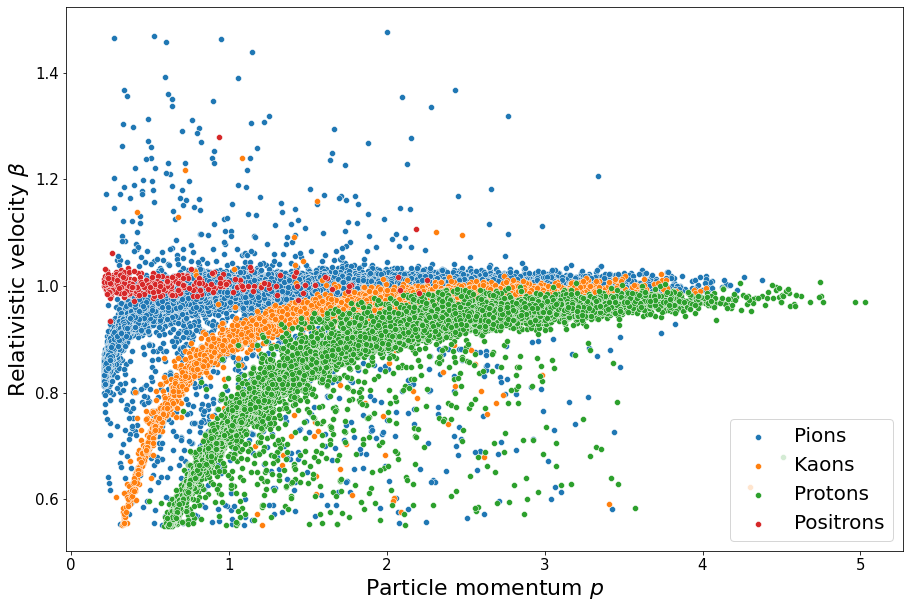

In [5]:
fig, ax1 = plt.subplots(figsize=(15,10))
sns.scatterplot(x=df2_pi.p, y=df2_pi.beta , data=df2, ax = ax1, label = "Pions");
sns.scatterplot(x=df2_ka.p, y=df2_ka.beta , data=df2, ax = ax1, label = "Kaons");
sns.scatterplot(x=df2_pr.p, y=df2_pr.beta , data=df2, ax = ax1, label = "Protons");
sns.scatterplot(x=df2_po.p, y=df2_po.beta , data=df2, ax = ax1, label = "Positrons");
ax1.set_xlabel(r'Particle momentum $p$',fontsize=22)
ax1.set_ylabel(r'Relativistic velocity $\beta$', fontsize=22)
ax1.tick_params(axis='both', which='major', labelsize=15)

plt.legend(loc="lower right", fontsize=20)

plt.show()

##### id : ( -11: positron, 211: pion, 321: kaon, proton: 2212)
##### p-momentum(GeV/c)
##### beta-relativistic velocity
##### theta- radiation
##### nphe- no of photoelectron
##### ein-inner energy(GeV)
##### eout-outer energy(GeV)


In [6]:
df2.describe()

,id,p,theta,beta,nphe,ein,eout
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,992.069800,1.231136,0.488721,0.899760,3.570100,0.056636,0.070433
std,971.914274,0.742582,0.294064,0.113260,17.841509,0.079218,0.102212
min,-11.000000,0.210117,0.093336,0.550041,0.000000,0.000000,0.000000
25%,211.000000,0.666056,0.281363,0.837612,0.000000,0.000000,0.000000
50%,211.000000,1.066450,0.404475,0.946710,0.000000,0.034562,0.044221
75%,2212.000000,1.655450,0.611951,0.985656,0.000000,0.068483,0.093935
max,2212.000000,5.028150,2.214270,1.476680,336.000000,0.816709,1.071140


In [7]:
del df2['nphe']

In [8]:
df2.groupby('id')['id'].agg('count')

id
-11        315
 211     56165
 321      4710
 2212    38810
Name: id, dtype: int64

In [9]:
df2.groupby('p')['p'].agg('count')

p
0.210117    9
0.210269    7
0.210422    5
0.210575    4
0.210727    6
           ..
4.742810    1
4.747080    1
4.764020    1
4.963150    1
5.028150    1
Name: p, Length: 19213, dtype: int64

In [10]:
df2.groupby('theta')['theta'].agg('count')

theta
0.093336    1
0.096516    1
0.098575    1
0.099038    1
0.100532    1
           ..
2.181950    1
2.185690    1
2.185730    1
2.206880    1
2.214270    1
Name: theta, Length: 92420, dtype: int64

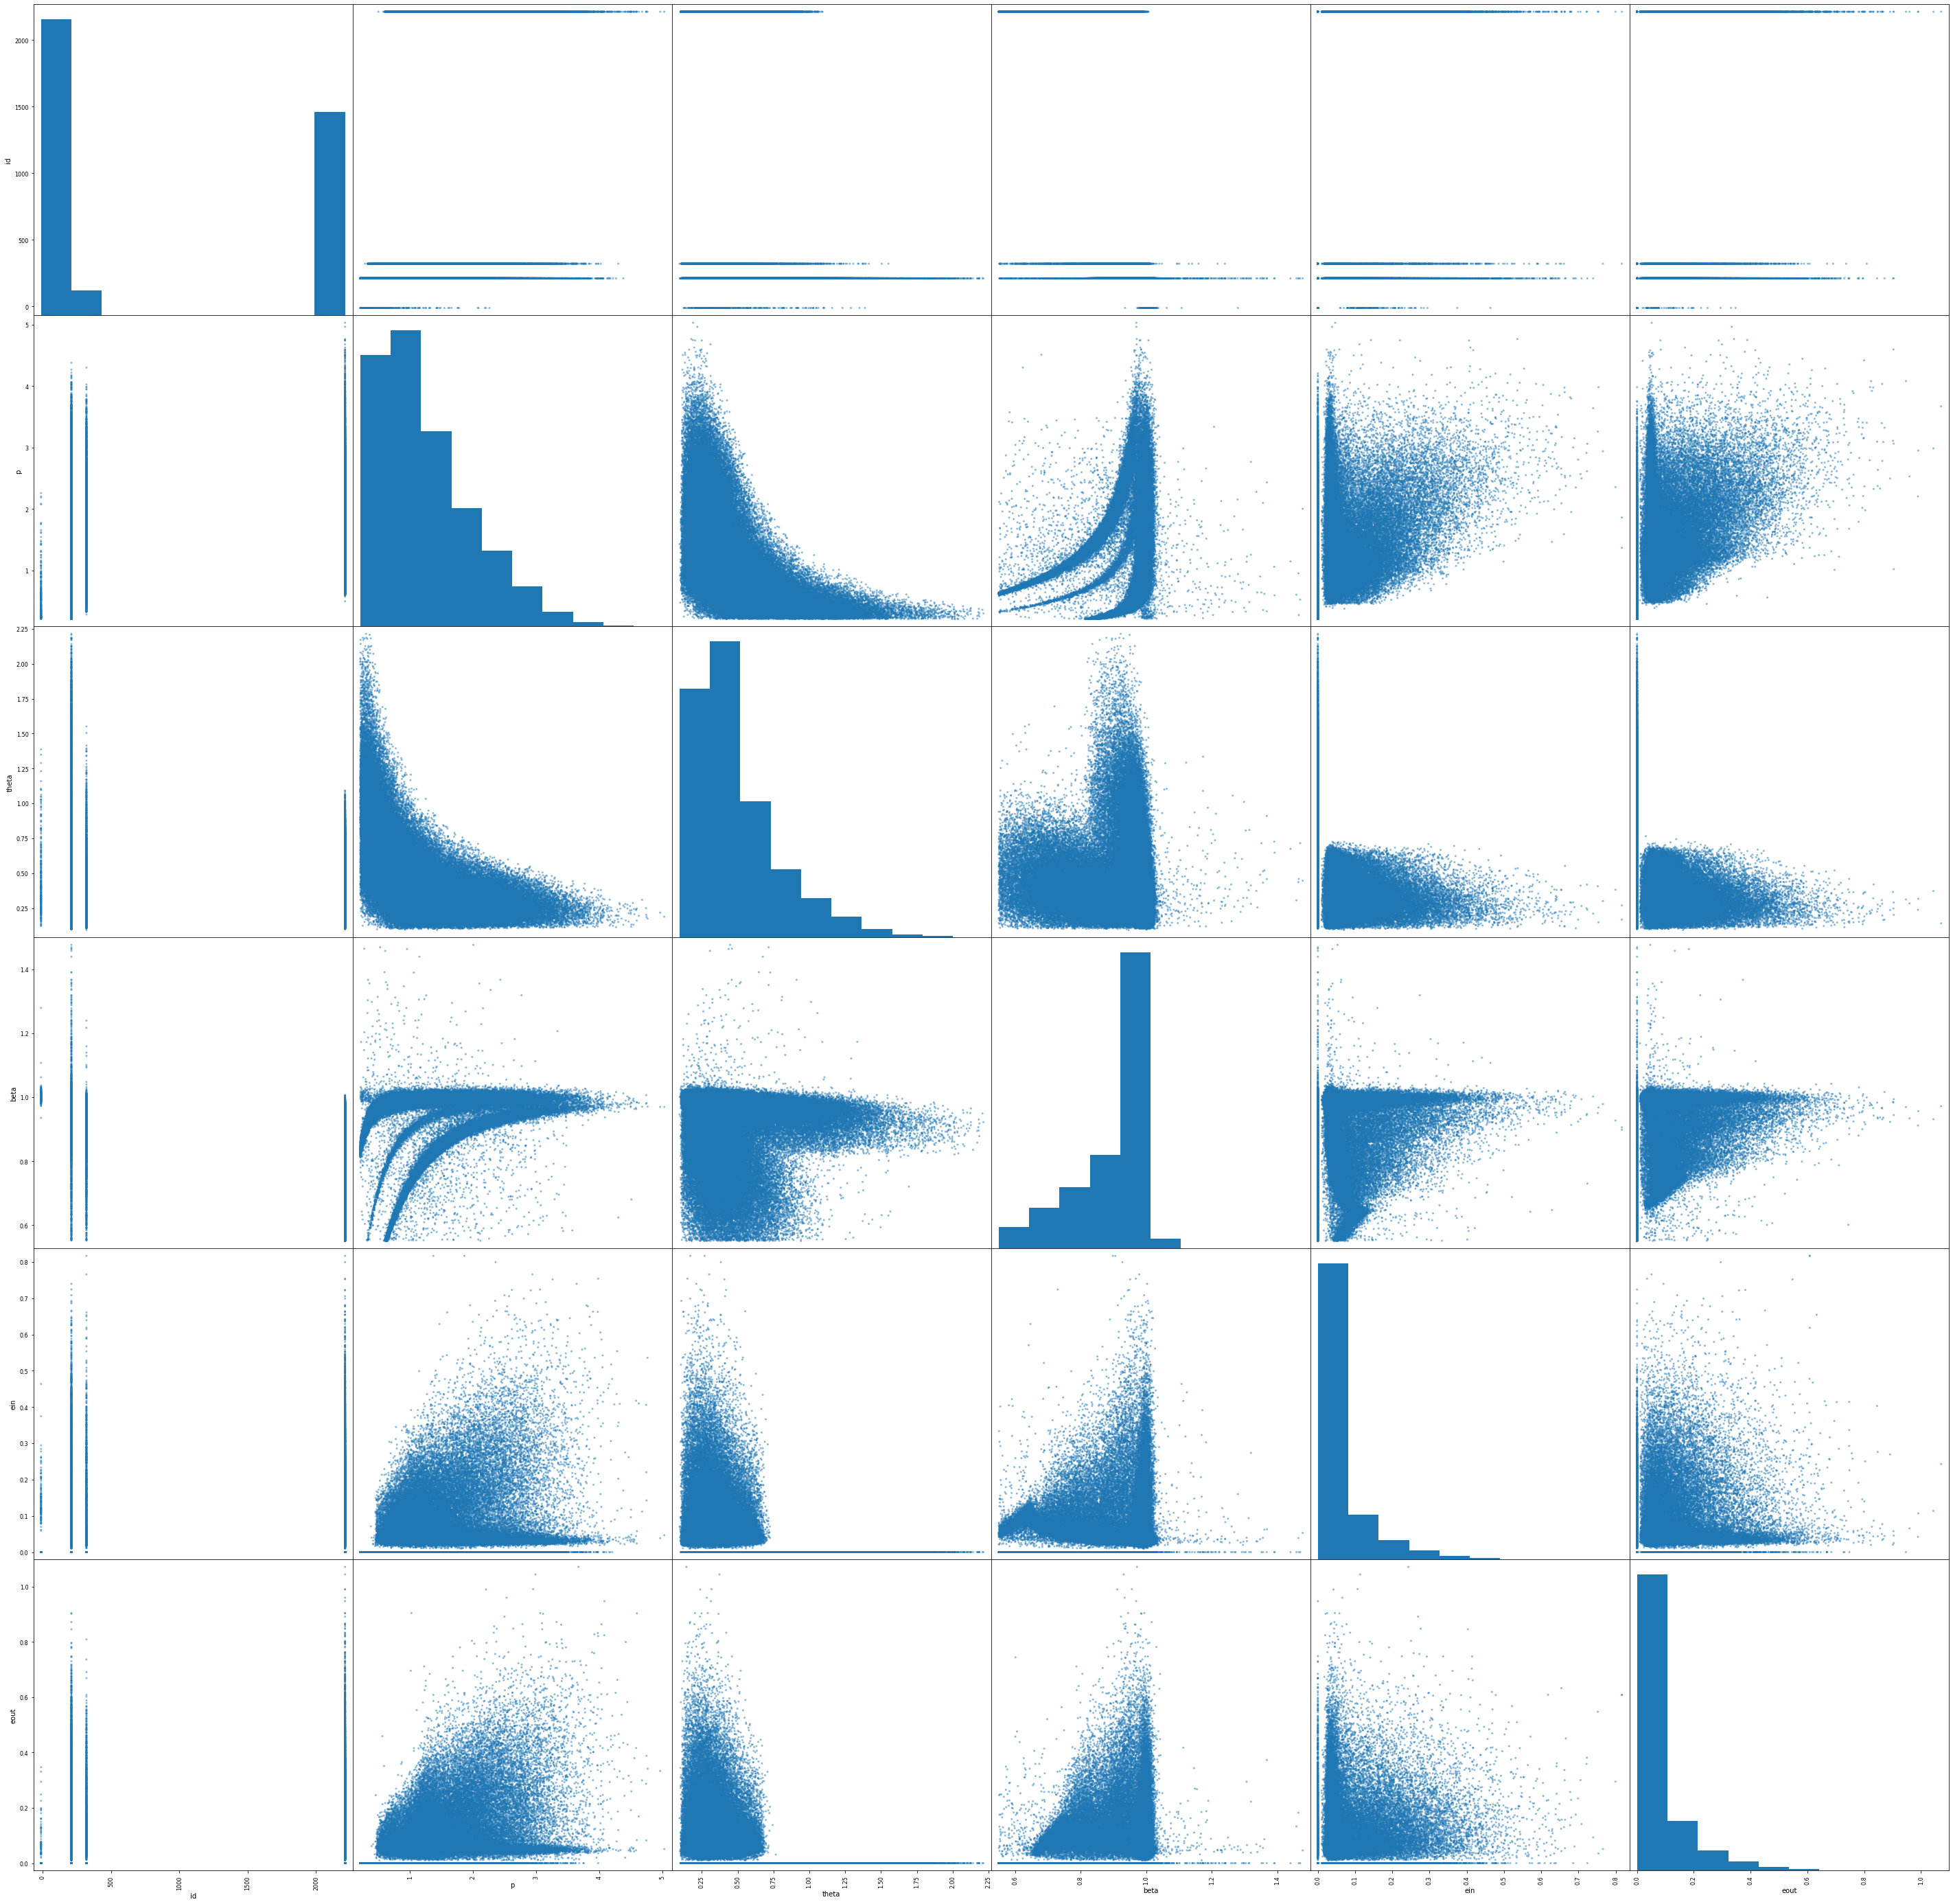

In [11]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df2,figsize=(50, 50))

In [12]:
df2.groupby('id')['id'].agg('count')

id
-11        315
 211     56165
 321      4710
 2212    38810
Name: id, dtype: int64

In [13]:
df2.isna().sum()

id       0
p        0
theta    0
beta     0
ein      0
eout     0
dtype: int64

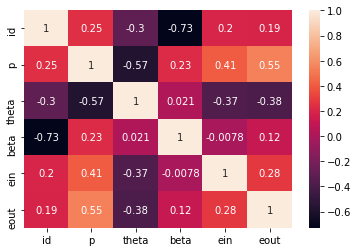

In [14]:
import seaborn as sns
sns.heatmap(df2.corr(), annot=True)
plt.show()

id
0.45700744411777927


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


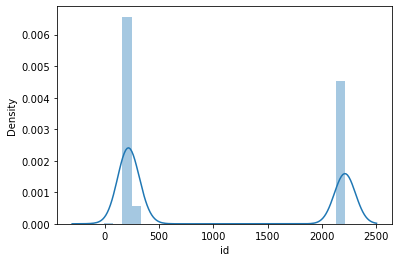

p
0.9440323713737551


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


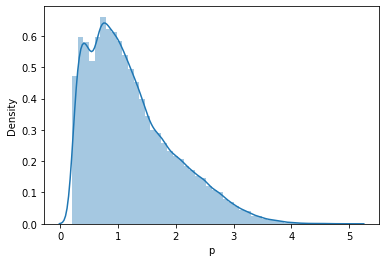

theta
1.5222343249712433


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


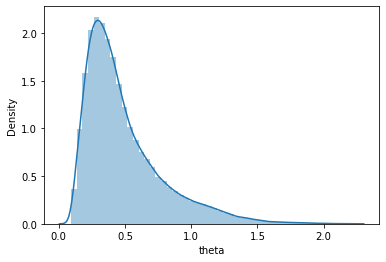

beta
-1.1299747200504981


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


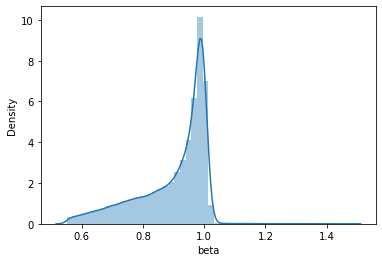

ein
2.586064432436295


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


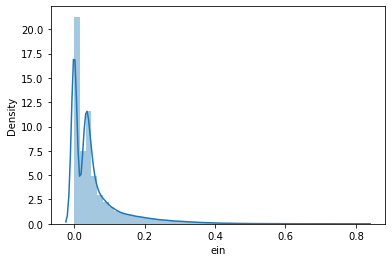

eout
2.363280875812958


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


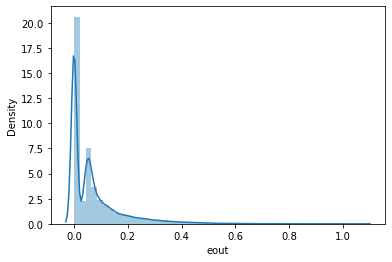

In [15]:
from scipy.stats import skew
import seaborn as sns
for col in df2:
    print(col)
    print(skew(df2[col]))
    plt.figure()
    sns.distplot(df2[col])
    plt.show()
    

#### Since eout, ein and p have relatively lower correlation it can be skew handled

In [16]:
df2["eout"]=np.sqrt(df2["eout"])

<ipython-input-16-32beb76fd059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["eout"]=np.sqrt(df2["eout"])


In [17]:
skew(df2["eout"])

0.6547063802329146

In [18]:
df2["ein"]=np.sqrt(df2["ein"])

<ipython-input-18-dacc289c6031>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ein"]=np.sqrt(df2["ein"])


In [19]:
skew(df2["ein"])

0.6275556808610504

In [20]:
df2["p"]=np.sqrt(df2["p"])

<ipython-input-20-8a5fce68885a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["p"]=np.sqrt(df2["p"])


In [21]:
skew(df2["ein"])

0.6275556808610504

In [22]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
df2.isnull().values.any()

False

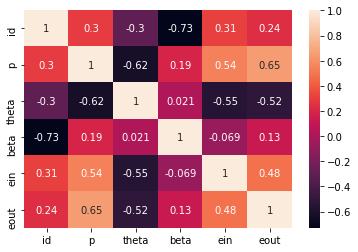

In [24]:
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [25]:
X = df2.drop(columns=['id'],axis = 1)
y = df2.id
# training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

### Adaboost

In [26]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [10, 100]
             }




DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)
model_ADC = AdaBoostClassifier(base_estimator = DTC)
grid_ADC  = GridSearchCV(model_ADC, param_grid=param_grid, scoring = 'roc_auc')


model_ADC.fit(X_train,y_train) 
pred_ADC  = model_ADC.predict(X_test)

acc_ADC   = accuracy_score(y_test,pred_ADC)
mse_ADC   = mean_squared_error(y_test, pred_ADC)
pre_ADC   = precision_score(y_test, pred_ADC, average='macro')



print("Accuracy:",acc_ADC)
print("Mean squared error:",mse_ADC)
print("Precision score:",pre_ADC)

Accuracy: 0.94995
Mean squared error: 74827.32605
Precision score: 0.78898420430791


### XG Boost

In [27]:
model_XGB    = XGBClassifier()
model_XGB.fit(X_train, y_train)
pred_XGB     = model_XGB.predict(X_test)

data_dmatrix = xgb.DMatrix(data=X,label=y)
params       = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.05,'max_depth': 5, 'alpha': 10}
XGB_cla      = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
acc_XGB      = accuracy_score(y_test,pred_XGB)

mae_XGB      = mean_absolute_error(y_test, pred_XGB)
mse_XGB      = mean_squared_error(y_test, pred_XGB)
pre_XGB      = precision_score(y_test, pred_XGB, average='macro')



print("Accuracy:",acc_XGB)
print("Mean squared error:",mse_XGB)
print("Precision score:",pre_XGB)


#fig, ax = plt.subplots(figsize=(20, 30))
#xgb.plot_importance(XGB_cla, ax=ax)
#xgb.plot_tree(XGB_cla, ax = ax)"""

C:\Users\ACER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.96785
Mean squared error: 44675.18935
Precision score: 0.8851341661438636


### K nearest neighbour

In [28]:
model_KNN  = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
model_KNN.fit(X_train, y_train)
model_KNN.predict(X_test)
pred_KNN  = model_KNN.predict(X_test)
acc_KNN   = accuracy_score(y_test, pred_KNN)
mae_KNN   = mean_absolute_error(y_test, pred_KNN)
mse_KNN   = mean_squared_error(y_test, pred_KNN)
pre_KNN   = precision_score(y_test, pred_KNN, average='macro')


print("Accuracy:",acc_KNN)
print("Mean squared error:",mse_KNN)
print("Precision score:",pre_KNN)

Accuracy: 0.9373
Mean squared error: 108052.26335
Precision score: 0.7380273756767244


### Support vector classifier

In [29]:
model_SVC = SVC(kernel="linear", C=0.025)
model_SVC.fit(X_train, y_train)
model_SVC.predict(X_test)
pred_SVC = model_KNN.predict(X_test)
acc_SVC  = accuracy_score(y_test, pred_SVC)
mse_SVC  = mean_squared_error(y_test, pred_SVC)
pre_SVC  = precision_score(y_test, pred_SVC, average='macro')


print("Accuracy:",acc_SVC)
print("Mean squared error:",mse_SVC)
print("Precision score:",pre_SVC)

Accuracy: 0.9373
Mean squared error: 108052.26335
Precision score: 0.7380273756767244


### Decision tree

In [30]:
model_DT = DecisionTreeClassifier(max_depth=5)
model_DT.fit(X_train, y_train)
model_DT.predict(X_test)
pred_DT = model_DT.predict(X_test)
acc_DT  = accuracy_score(y_test, pred_DT)
mse_DT  = mean_squared_error(y_test, pred_DT)
pre_DT  = precision_score(y_test, pred_DT, average='macro')


print("Accuracy:",mse_DT)
print("Mean squared error:",acc_DT)
print("Precision score:",pre_DT)

Accuracy: 61633.50215
Mean squared error: 0.95775
Precision score: 0.8234925971467296


### Random forest classifier

In [31]:
model_RF = Pipeline([
        ('classifier', RandomForestClassifier(n_estimators =100, min_samples_leaf=2, min_samples_split=8, max_depth=10, max_features=3, random_state=0))
])

model_RF.fit(X_train, y_train)
pred_RF = model_RF.predict(X_test)
acc_RF  = accuracy_score(y_test, pred_RF)
mse_RF  = mean_squared_error(y_test, pred_RF)
pre_RF  = precision_score(y_test, pred_RF, average='macro')



# feature importance
#tree_feature_importances = (
#    model_RF.named_steps['classifier'].feature_importances_)
#sorted_idx = tree_feature_importances.argsort()

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 10
#fig_size[1] = 8
#plt.rcParams["figure.figsize"] = fig_size
#y_ticks = np.arange(0, len(X.columns))
#fig, ax = plt.subplots()
#ax.barh(y_ticks, tree_feature_importances[sorted_idx])
#ax.set_yticklabels(X.columns[sorted_idx])
#ax.set_yticks(y_ticks)
#ax.set_title("Random Forest Feature Importances")
#plt.show()


print("Accuracy:",acc_RF)
print("Mean squared error:",mse_RF)
print("Precision score:",pre_RF)

Accuracy: 0.96665
Mean squared error: 44855.7884
Precision score: 0.8841009125607246


AdaBoost            : Accuracy: 94.99%, Precision: 78.90%, mean sq. error : 74827.33
Decision Tree       : Accuracy: 95.78%, Precision: 82.35%, mean sq. error : 61633.50
XGBoost             : Accuracy: 96.78%, Precision: 88.51%, mean sq. error : 44675.19
KNearNeigh          : Accuracy: 93.73%, Precision: 73.80%, mean sq. error : 108052.26
Random forest       : Accuracy: 96.67%, Precision: 88.41%, mean sq. error : 44855.79
SVC                 : Accuracy: 93.73%, Precision: 73.80%, mean sq. error : 108052.26


<ipython-input-32-0a4e1d07bbc0>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axRes[2].set_xticklabels(labels)


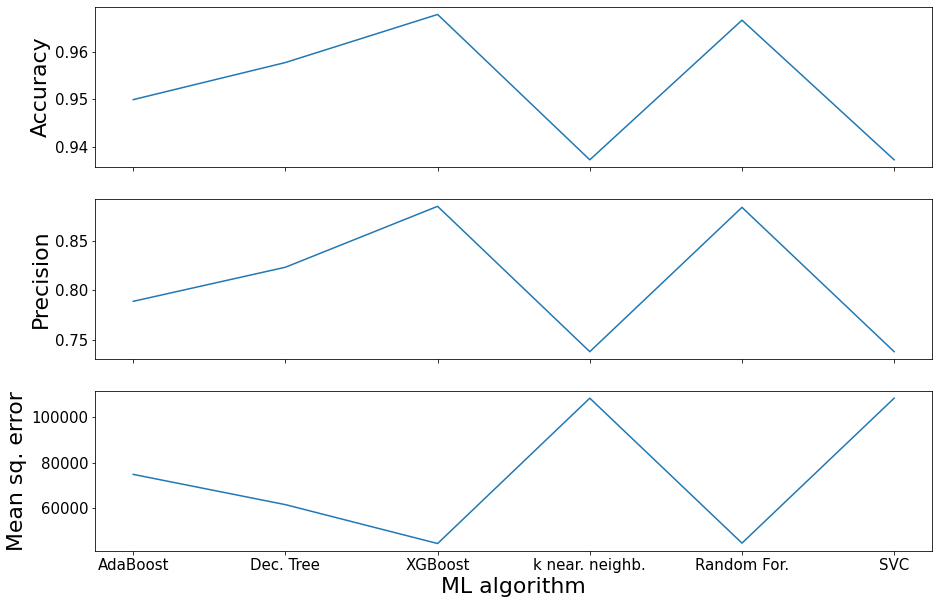

In [32]:
print("AdaBoost            : Accuracy: %.2f%%, Precision: %.2f%%, mean sq. error : %.2f" % (acc_ADC * 100.0, pre_ADC * 100.0, mse_ADC))
print("Decision Tree       : Accuracy: %.2f%%, Precision: %.2f%%, mean sq. error : %.2f" % (acc_DT * 100.0, pre_DT * 100.0, mse_DT))
print("XGBoost             : Accuracy: %.2f%%, Precision: %.2f%%, mean sq. error : %.2f" % (acc_XGB * 100.0, pre_XGB * 100.0, mse_XGB))
print("KNearNeigh          : Accuracy: %.2f%%, Precision: %.2f%%, mean sq. error : %.2f" % (acc_KNN * 100.0, pre_KNN * 100.0, mse_KNN))

print("Random forest       : Accuracy: %.2f%%, Precision: %.2f%%, mean sq. error : %.2f" % (acc_RF * 100.0, pre_RF * 100.0, mse_RF))
print("SVC                 : Accuracy: %.2f%%, Precision: %.2f%%, mean sq. error : %.2f" % (acc_SVC * 100.0, pre_SVC * 100.0, mse_SVC))


labels = ['', 'AdaBoost','Dec. Tree','XGBoost','k near. neighb.',  'Random For.', 'SVC']


figRes, axRes = plt.subplots(3, sharex=True, figsize=(15,10))
axRes[0].set_ylabel('Accuracy', fontsize=22)
axRes[0].tick_params(axis='both', which='major', labelsize=15)
axRes[0].plot([acc_ADC, acc_DT, acc_XGB, acc_KNN, acc_RF, acc_SVC])
axRes[1].set_ylabel('Precision', fontsize=22)
axRes[1].tick_params(axis='both', which='major', labelsize=15)
axRes[1].plot([pre_ADC, pre_DT, pre_XGB, pre_KNN, pre_RF, pre_SVC])
axRes[2].set_xlabel(r'ML algorithm',fontsize=22)
axRes[2].set_ylabel(r'Mean sq. error', fontsize=22)
axRes[2].tick_params(axis='both', which='major', labelsize=15)
axRes[2].set_xticklabels(labels)
axRes[2].plot([mse_ADC, mse_DT, mse_XGB, mse_KNN,  mse_RF, mse_SVC])

### FROM THIS WE CAN SEE THAT XG BOOST HAS THE BEST ACCURACY

In [33]:
y_pred=model_XGB.predict(X_test)
y_pred

array([ 211,  211, 2212, ...,  211, 2212, 2212], dtype=int64)

In [34]:
y_test

3582      211
60498     211
53227    2212
21333     211
3885      321
         ... 
60116     211
2415     2212
43763     211
71345    2212
77687    2212
Name: id, Length: 20000, dtype: int64

Text(69.0, 0.5, 'Truth')

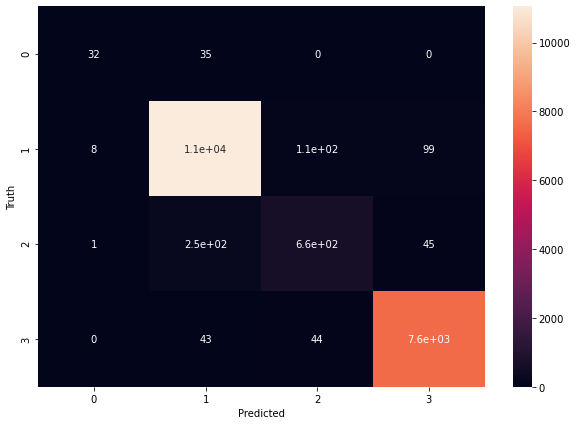

In [35]:
from sklearn.metrics import confusion_matrix
cmrf = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cmrf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 3', 'class 4']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.48      0.59        67
     class 1       0.97      0.98      0.98     11274
     class 3       0.81      0.69      0.74       964
     class 4       0.98      0.99      0.99      7695

    accuracy                           0.97     20000
   macro avg       0.89      0.78      0.82     20000
weighted avg       0.97      0.97      0.97     20000



In [37]:
import pickle
pickle.dump(model_XGB, open("model.pkl", "wb"))

In [38]:
X_test

,p,theta,beta,ein,eout
3582,1.217982,0.225981,1.015450,0.193035,0.189565
60498,1.009455,0.691241,0.992941,0.000000,0.000000
53227,0.910842,0.717896,0.673027,0.000000,0.000000
21333,0.533890,0.659170,0.876191,0.000000,0.000000
3885,1.379754,0.306286,0.974882,0.185044,0.200480
...,...,...,...,...,...
60116,0.501163,0.422500,0.863388,0.000000,0.000000
2415,1.140605,0.513436,0.821512,0.397290,0.138329
43763,1.205388,0.308597,0.988354,0.368725,0.284247
71345,1.110509,0.247013,0.779758,0.322569,0.000000
